# Sigmoid

# $S_{m, c}(x) = \frac{1}{1 + e^{-(mx + c)}}$

In [4]:
def Linear(x,m,c):
    return (m*x+c)

In [6]:
def Sigmoid(x,m,c):
  return 1/(1+np.exp(-(Linear(x,m,c))))

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
Sigmoid(4,2,1)

0.9998766054240137

In [9]:
Linear(4,2,1)

9

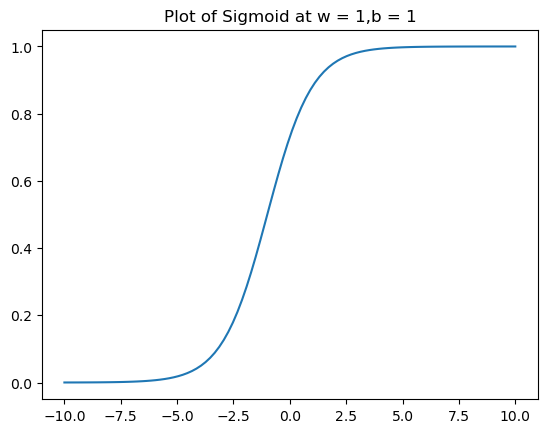

In [10]:
m = 1
c = 1
X = np.linspace(-10,10,100)
Y = Sigmoid(X,m,c)
plt.plot(X,Y)
plt.title("Plot of Sigmoid at w = {},b = {}".format(m,c));

In [13]:
max(Y), min(Y)

(0.999983298578152, 0.00012339457598623172)

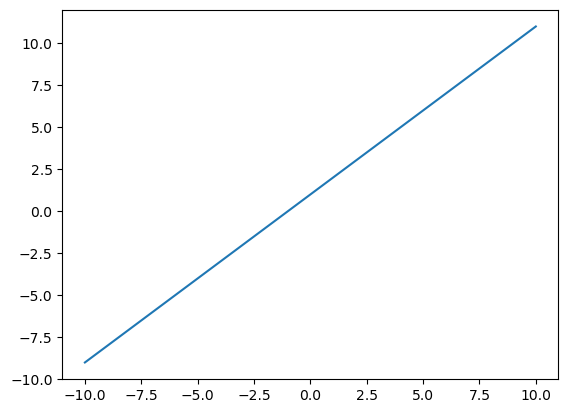

In [12]:
z = Linear(X,m,c)
plt.plot(X,z)

# Logistic Regression

In [14]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
df.drop(columns="id", inplace=True)

In [16]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [17]:
# Preprocessing on the dataset
set(y)

{'B', 'M'}

In [22]:
y = y.map({"M" :1, "B" : 0})

In [23]:
y.unique()

array([1, 0])

In [24]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [25]:
X.drop(columns="Unnamed: 32",inplace=True)

In [26]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [27]:
# Apply Standard Scaler
# Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [28]:
X_train.shape

(455, 30)

In [29]:
X_test.shape

(114, 30)

In [30]:
y_train.shape, y_test.shape

((455,), (114,))

In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train) # Learn the mean and variance of each column of X_train

StandardScaler()

In [32]:
ss.var_

array([1.17422328e+01, 1.89262248e+01, 5.56184923e+02, 1.12472224e+05,
       1.93432181e-04, 2.73890548e-03, 6.03088430e-03, 1.41306683e-03,
       7.75151409e-04, 5.22015422e-05, 5.22272844e-02, 2.96603971e-01,
       2.72454099e+00, 1.11225447e+03, 8.56210773e-06, 3.33119122e-04,
       1.02227931e-03, 3.81168424e-05, 6.58996927e-05, 7.82488377e-06,
       2.27880708e+01, 3.83366571e+01, 1.10051782e+03, 3.10780942e+05,
       4.99102524e-04, 2.45350136e-02, 4.38240496e-02, 4.38007396e-03,
       3.99969654e-03, 3.39353899e-04])

In [33]:
ss.mean_

array([1.39290044e+01, 1.92000659e+01, 9.05723297e+01, 6.35185934e+02,
       9.55055165e-02, 1.02000286e-01, 8.51293488e-02, 4.63904286e-02,
       1.80281319e-01, 6.28745714e-02, 3.87667033e-01, 1.21293582e+00,
       2.74135824e+00, 3.71670659e+01, 7.00668571e-03, 2.53975626e-02,
       3.18953969e-02, 1.16513451e-02, 2.05194022e-02, 3.83131495e-03,
       1.60120835e+01, 2.55218242e+01, 1.05490374e+02, 8.52457582e+02,
       1.31108132e-01, 2.49254549e-01, 2.65195444e-01, 1.10936837e-01,
       2.88758242e-01, 8.39120659e-02])

In [34]:
ss.transform(X_train) # x - ss.mean_/(sqrt(ss.var_))

array([[-0.54542492, -1.48492648, -0.58228368, ..., -0.61477077,
        -0.59070807, -0.26773334],
       [-0.7613765 ,  1.81130083, -0.79768785, ..., -1.36149805,
        -0.06100647, -0.70797834],
       [-0.25651673, -0.14023124, -0.23246391, ...,  0.22457971,
         0.35643001, -0.04028247],
       ...,
       [ 0.91370734,  0.41373723,  0.90010408, ...,  1.08432844,
        -0.4183574 , -0.43004315],
       [ 1.90008075,  0.59302993,  1.83295678, ...,  0.99064756,
        -0.44049419, -0.89905878],
       [ 0.31254485, -0.84820754,  0.2916297 , ...,  0.40740852,
         0.1050194 , -0.01585457]])

In [35]:
X_train_transform = pd.DataFrame(ss.transform(X_train), columns = X_train.columns)
X_train_transform.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.545425,-1.484926,-0.582284,-0.556360,-0.172240,-0.947563,-0.842266,-0.711888,-0.764373,-0.526580,...,-0.601649,-1.148613,-0.645395,-0.573400,-0.161506,-0.804758,-0.854274,-0.614771,-0.590708,-0.267733
1,-0.761376,1.811301,-0.797688,-0.714097,-1.917999,-1.220423,-0.885919,-1.150958,0.237727,-0.912735,...,-0.823700,1.328913,-0.773809,-0.717801,-1.749198,-0.677074,-0.746604,-1.361498,-0.061006,-0.707978
2,-0.256517,-0.140231,-0.232464,-0.367315,0.912748,0.542657,0.140366,0.256434,0.833958,0.295558,...,-0.381693,-0.108505,-0.339735,-0.468643,0.142873,0.105630,-0.037716,0.224580,0.356430,-0.040282
3,1.818369,0.105722,1.718470,1.904811,-1.100484,-0.312610,0.391078,0.821201,0.449640,-1.649061,...,1.476410,-0.402448,1.347729,1.443184,-1.150736,-0.610040,-0.021952,0.476914,0.264720,-1.334418
4,0.677328,0.071242,0.815299,0.538554,0.510101,1.668109,1.783065,1.211722,1.250602,0.402132,...,0.288648,-0.399218,0.500681,0.156495,0.295062,1.257340,1.550117,1.005757,0.680576,0.404305


In [36]:
X_train_transform.describe() # mean = 0, std = 1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,3.006142e-16,-4.792259e-16,-3.825999e-16,1.464030e-16,-4.216407e-16,-1.952040e-16,6.636938e-17,8.588978e-17,-3.669836e-16,-5.543795e-16,...,4.606816e-16,4.684897e-17,-3.865040e-16,1.795877e-16,3.279428e-16,-1.561632e-17,7.027346e-17,1.561632e-17,6.129407e-16,-5.231468e-16
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-2.027611e+00,-2.181410e+00,-1.983683e+00,-1.466105e+00,-3.082798e+00,-1.578695e+00,-1.096198e+00,-1.234091e+00,-2.668003e+00,-1.748714e+00,...,-1.693049e+00,-2.180647e+00,-1.660345e+00,-1.196923e+00,-2.682924e+00,-1.417067e+00,-1.266805e+00,-1.676236e+00,-2.091266e+00,-1.567297e+00
25%,-6.723694e-01,-7.551133e-01,-6.745089e-01,-6.546105e-01,-7.434947e-01,-7.557203e-01,-7.431144e-01,-7.226620e-01,-6.889460e-01,-6.345372e-01,...,-6.592566e-01,-7.609953e-01,-6.610701e-01,-6.156440e-01,-6.986442e-01,-6.990995e-01,-7.628449e-01,-7.375381e-01,-6.365628e-01,-6.862647e-01
50%,-2.390071e-01,-9.196013e-02,-2.553612e-01,-3.154317e-01,-6.295061e-02,-2.302549e-01,-3.418719e-01,-3.982473e-01,-6.757236e-02,-1.833301e-01,...,-2.811420e-01,-1.967553e-02,-2.845710e-01,-3.567097e-01,-4.512555e-02,-2.806149e-01,-2.082499e-01,-2.572724e-01,-1.289980e-01,-2.194204e-01
75%,4.000928e-01,6.010751e-01,4.506387e-01,2.603524e-01,6.359282e-01,5.092183e-01,4.284211e-01,5.478623e-01,5.394343e-01,4.512664e-01,...,3.734885e-01,6.400829e-01,4.253211e-01,2.236726e-01,6.330119e-01,5.180492e-01,5.441077e-01,7.277367e-01,4.489301e-01,4.444756e-01
max,3.878664e+00,4.615623e+00,3.880992e+00,4.815040e+00,4.881689e+00,4.650842e+00,4.394490e+00,3.854923e+00,4.443672e+00,4.784100e+00,...,3.585891e+00,3.879117e+00,3.732122e+00,4.627170e+00,3.522370e+00,5.163197e+00,4.713841e+00,2.720722e+00,5.930156e+00,6.708874e+00


In [37]:
ss.transform(X_test) # X_test - ss.mean_/(sqrt(ss.var_)) --> based on training data

array([[ 1.25222603, -0.11494637,  1.26052444, ...,  0.3258155 ,
         0.21095972, -0.21942038],
       [ 0.41176584, -1.13553558,  0.5057618 , ...,  1.93954423,
         2.81361296,  0.84400743],
       [ 0.36799187, -1.37689114,  0.30011018, ..., -0.44055455,
        -0.63340044, -0.88223067],
       ...,
       [ 0.40009278,  1.39524982,  0.50152156, ...,  1.38199188,
         1.80164573,  0.80600848],
       [ 1.63451868, -0.06897389,  1.65062648, ...,  1.31550868,
         0.12715619,  0.83477911],
       [-0.70301121, -0.98152775, -0.70821879, ..., -0.22448413,
        -0.35352825, -0.31604629]])

In [38]:
X_test_transform = pd.DataFrame(ss.transform(X_test), columns = X_train.columns)
X_test_transform.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.252226,-0.114946,1.260524,1.186199,1.387295,0.888509,1.185580,1.585750,1.038688,0.031201,...,0.961085,-0.224790,0.892554,0.840469,-0.139125,-0.124840,-0.013831,0.325815,0.210960,-0.219420
1,0.411766,-1.135536,0.505762,0.206382,0.848037,2.130518,1.578323,1.361227,2.579551,1.030500,...,0.431096,-1.040403,0.591113,0.230399,0.353252,2.209864,1.745014,1.939544,2.813613,0.844007
2,0.367992,-1.376891,0.300110,0.228447,-1.141467,-0.624067,-0.659286,-0.527268,-0.293853,-1.028997,...,0.039365,-1.581454,-0.029854,-0.059837,-0.828453,-0.482356,-0.616195,-0.440555,-0.633400,-0.882231
3,-1.243474,-0.252864,-1.251393,-1.040305,-0.891251,-0.911831,-0.905749,-1.080622,-0.441115,0.172376,...,-1.018518,-0.145651,-1.036363,-0.847133,0.344300,-0.790074,-0.960655,-1.298490,0.267883,-0.280219
4,0.446785,0.064346,0.471840,0.339072,0.984649,0.387884,0.791548,0.917235,0.460416,-0.680212,...,0.680379,0.077229,0.585085,0.544493,1.051532,-0.062913,0.544108,0.611391,-0.079981,-0.202049


In [39]:
X_test_transform.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.288820,0.102778,0.295598,0.293238,0.306754,0.223236,0.235873,0.335758,0.157858,-0.053167,...,0.268823,0.125270,0.266433,0.251815,0.281606,0.159660,0.166731,0.276732,0.103965,0.009145
std,1.105612,0.937011,1.113147,1.199513,1.018619,1.025708,1.107007,1.112847,0.909288,0.878159,...,1.033395,0.955977,1.036061,1.079517,1.076931,1.012155,0.971169,0.932807,0.880330,0.897349
min,-1.673042,-2.027402,-1.647856,-1.291969,-2.138736,-1.266091,-1.096198,-1.234091,-1.414481,-1.787468,...,-1.478959,-1.634751,-1.472246,-1.098444,-1.640875,-1.194258,-1.266805,-1.676236,-1.960026,-1.555898
25%,-0.500192,-0.483301,-0.514334,-0.518641,-0.484830,-0.565788,-0.596962,-0.528532,-0.483318,-0.810660,...,-0.497956,-0.564764,-0.484125,-0.500482,-0.384194,-0.572533,-0.526031,-0.419967,-0.565014,-0.666722
50%,0.176846,-0.026449,0.155094,0.066387,0.281456,0.064006,-0.128116,0.050001,-0.006513,-0.188866,...,0.083356,-0.012408,0.093737,-0.040284,0.198825,-0.103453,-0.006427,0.162629,0.048887,-0.199878
75%,0.963318,0.533840,0.948867,0.852164,1.045765,0.763830,0.864624,1.071860,0.612167,0.410436,...,0.912380,0.751119,0.878989,0.796521,0.818772,0.663609,0.625195,0.933230,0.527990,0.438504
max,4.138390,3.358275,4.152368,5.563470,3.537138,3.529212,4.399640,4.118286,3.060846,2.301077,...,4.195483,2.637124,4.392277,6.101670,4.095318,4.396454,3.217246,2.333911,2.813613,3.060975


In [48]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_transform,y_train)

LogisticRegression()

In [49]:
log.coef_ 

array([[ 0.52440791,  0.3538776 ,  0.48283518,  0.55618534,  0.16412733,
        -0.56099493,  0.65608113,  0.93209857, -0.18249969, -0.18904529,
         0.9232619 ,  0.05604271,  0.52794723,  0.92418649,  0.24053187,
        -0.73991252, -0.10411317,  0.29553531, -0.36218226, -0.56711248,
         0.85200598,  1.11660637,  0.73432894,  0.82345992,  0.76943694,
        -0.04701007,  0.6782998 ,  0.90918191,  0.99273142,  0.57387844]])

In [50]:
log.intercept_

array([-0.88882401])

In [51]:
y_pred_test = log.predict(X_test_transform)
y_pred_train = log.predict(X_train_transform)

In [52]:
y_pred_test[:5]

array([1, 1, 0, 0, 1])

In [53]:
y_pred_train[:5]

array([0, 0, 0, 1, 1])

In [54]:
y_train[:5]

158    0
231    0
356    0
321    1
479    1
Name: diagnosis, dtype: int64